In [1]:
from main import *
%matplotlib widget



def get_current_directory():
    try:
        
        directory = os.path.dirname(os.path.abspath(__file__))

    except:
        
        ip = IPython.get_ipython()
        directory = None
        if '__vsc_ipynb_file__' in ip.user_ns:
            directory = os.path.dirname(ip.user_ns['__vsc_ipynb_file__'])
        
    return directory 


def salvar(a):
    
    script_dir = get_current_directory()
    
    dados_dir = os.path.join(script_dir, 'dados')
    
    os.makedirs(dados_dir, exist_ok=True)
    
    file_path = os.path.join(dados_dir, f'{a}.pickle')
    
    with open(file_path, 'wb') as f:
        pickle.dump(eval(a), f)

def abrir(a):
    
    script_dir = get_current_directory()
    
    file_path = os.path.join(script_dir, 'dados', f'{a}.pickle')
    
    with open(file_path, 'rb') as f:
        return pickle.load(f)
    
def salvar_obj(obj, filename):
    script_dir = get_current_directory()
    dados_dir = os.path.join(script_dir, 'dados')
    os.makedirs(dados_dir, exist_ok=True)
    
    file_path = os.path.join(dados_dir, f'{filename}.pickle')
    
    with open(file_path, 'wb') as f:
        pickle.dump(obj, f)

# Backend IBM

In [2]:
def run_estimator_ibm(circuit, driver, backend, shots = 1000, mapper = JordanWignerMapper()):
   
   hamiltoniano = driver.second_q_ops()[0]
   
   num_qubits_hamiltonian = mapper.map(hamiltoniano).num_qubits
   num_qubits_circuit = circuit.num_qubits
   
   new_circuit = circuit.copy()
   
   if num_qubits_hamiltonian != num_qubits_circuit:

      new_circuit = QuantumCircuit(num_qubits_hamiltonian)

      for gate in circuit.data:

         if all(circuit.qubits.index(qubit) < num_qubits_hamiltonian for qubit in gate[1]):
            new_circuit.append(gate[0], [circuit.qubits.index(qubit) for qubit in gate[1]])
   
   circuit = new_circuit
      
   #estimator = EstimatorV2(backend = backend, options = {"shots" : shots})
   estimator = EstimatorV2(backend = backend)
   estimator.options.default_shots = shots
   
   #job = estimator.run(circuit, mapper.map(hamiltoniano))
   job = estimator.run([(circuit, mapper.map(hamiltoniano), [])])
   
   return job

In [3]:
service = QiskitRuntimeService()
kyoto_backend = service.backend('ibm_kyoto')
brisbane_backend = service.backend('ibm_brisbane')

In [4]:
circuito_ibm_kyoto = fix_circuit_qubits(transpile(minimum_eigenvalue.optimal_circuit.decompose().assign_parameters(minimum_eigenvalue.optimal_parameters), kyoto_backend), es_problem)

circuito_ibm_brisbane = fix_circuit_qubits(transpile(minimum_eigenvalue.optimal_circuit.decompose().assign_parameters(minimum_eigenvalue.optimal_parameters), brisbane_backend), es_problem)

In [5]:
#id_kyoto_Estimator_original = "ctna7mpx7b5g0080gnwg"
#id_brisbane_Estimator_original = "ctnahszx7b5g0080gpy0"

#salvar("id_kyoto_Estimator_original")
#salvar("id_brisbane_Estimator_original")

id_kyoto_Estimator_original = abrir("id_kyoto_Estimator_original")
id_brisbane_Estimator_original = abrir("id_brisbane_Estimator_original")


In [6]:
job_result_kyoto = service.job(id_kyoto_Estimator_original).result()
job_result_brisbane = service.job(id_brisbane_Estimator_original).result()

for idx, pub_result in enumerate(job_result_kyoto):
    print(f"Expectation value original circuit [Kyoto]: {pub_result.data.evs}")
    
for idx, pub_result in enumerate(job_result_brisbane):
    print(f"Expectation values original circuit [Brisbane]: {pub_result.data.evs}")

Expectation value original circuit [Kyoto]: -1.0998333721520073
Expectation values original circuit [Brisbane]: -0.8618584610707686


In [7]:
#zne_circuits_brisbane = list(ZNE_transpile(circuito_ibm_brisbane, brisbane_backend, start = 1, end = 2.5, points = 20, verbose = 1))
#salvar("zne_circuits_brisbane")

zne_circuits_brisbane = abrir("zne_circuits_brisbane")

In [8]:
for index, (a, b) in enumerate(zne_circuits_brisbane):
    
    print(index, a.depth(), b)

0 143 1.0
1 153 1.075
2 161 1.15
3 167 1.2249999999999999
4 171 1.2999999999999998
5 181 1.3749999999999998
6 193 1.4499999999999997
7 201 1.5249999999999997
8 209 1.5999999999999996
9 217 1.6749999999999996
10 223 1.7499999999999996
11 235 1.8249999999999995
12 247 1.8999999999999995
13 257 1.9749999999999994
14 263 2.0499999999999994
15 273 2.124999999999999
16 283 2.1999999999999993
17 295 2.2749999999999995
18 303 2.349999999999999
19 307 2.424999999999999


In [12]:
def check_pending():
    
    return len(service.jobs(pending=True))

In [16]:
for index, (circuito_zne, lambda_value) in enumerate(zne_circuits_brisbane):
    
    ultimo_index = 3
    
    if index <= ultimo_index:
        continue
    
    while check_pending() > 2:
        print("Waiting for jobs to finish")
        time.sleep(120)
    
    job = run_estimator_ibm(circuito_zne, es_problem, brisbane_backend, 2500)
    
    job_id = job.job_id()

    salvar_obj(job_id, f"id_brisbane_Estimator_zne_1_{index}")
    
    print(f"Index: {index} \t Lambda : {lambda_value} \t Task ID: {job_id}")

Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
Waiting for jobs to finish
W

In [24]:
# zne_circuits_brisbane_results = []

# for index, (circuito_zne, lambda_value) in enumerate(zne_circuits_brisbane):
    
#     job_id = abrir(f"id_brisbane_Estimator_zne_1_{index}")
    
#     job_result = service.job(job_id).result()[0].data.evs

#     zne_circuits_brisbane_results.append([job_result, lambda_value])
    
#     print(f"Index: {index} \t Lambda : {lambda_value} \t Result: {job_result}")
    
# salvar_obj(zne_circuits_brisbane_results, "zne_circuits_brisbane_results")
    
zne_circuits_brisbane_results = abrir("zne_circuits_brisbane_results")

Index: 0 	 Lambda : 1.0 	 Result: -0.8901034528679567
Index: 1 	 Lambda : 1.075 	 Result: -0.8728991558042863
Index: 2 	 Lambda : 1.15 	 Result: -0.898285945569179
Index: 3 	 Lambda : 1.2249999999999999 	 Result: -0.9239436468159589
Index: 4 	 Lambda : 1.2999999999999998 	 Result: -0.8558137804949071
Index: 5 	 Lambda : 1.3749999999999998 	 Result: -0.8539645764569427
Index: 6 	 Lambda : 1.4499999999999997 	 Result: -0.8843395923446163
Index: 7 	 Lambda : 1.5249999999999997 	 Result: -0.8971315327033753
Index: 8 	 Lambda : 1.5999999999999996 	 Result: -0.9795892204342088
Index: 9 	 Lambda : 1.6749999999999996 	 Result: -0.8457927780470582
Index: 10 	 Lambda : 1.7499999999999996 	 Result: -0.8470253747367668
Index: 11 	 Lambda : 1.8249999999999995 	 Result: -0.7648818819490459
Index: 12 	 Lambda : 1.8999999999999995 	 Result: -0.831331314304542
Index: 13 	 Lambda : 1.9749999999999994 	 Result: -0.8116793323766252
Index: 14 	 Lambda : 2.0499999999999994 	 Result: -0.8480638019030983
Inde

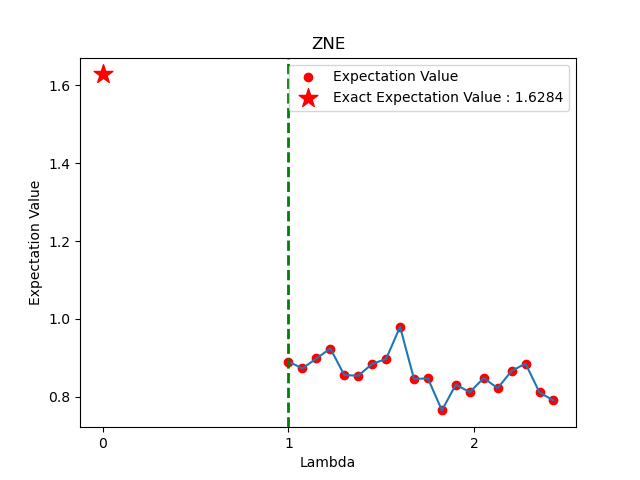

In [28]:
plt.figure()

x, y = np.array([a[1] for a in zne_circuits_brisbane_results]), np.array([a[0] for a in zne_circuits_brisbane_results])

plt.plot(x, -y)
plt.scatter(x, -y, c='red', label = "Expectation Value")

exact_value = 1.6283761394092897

plt.scatter(0, exact_value, color='red', marker='*', s=200, label=f'Exact Expectation Value : {exact_value:.4f}')
plt.xticks(np.arange(0, 3, 1))
plt.axvline(x=1, color='green', linestyle='--', linewidth=2)

plt.xlabel("Lambda")
plt.ylabel("Expectation Value")
plt.title("ZNE")
plt.legend()
plt.show()

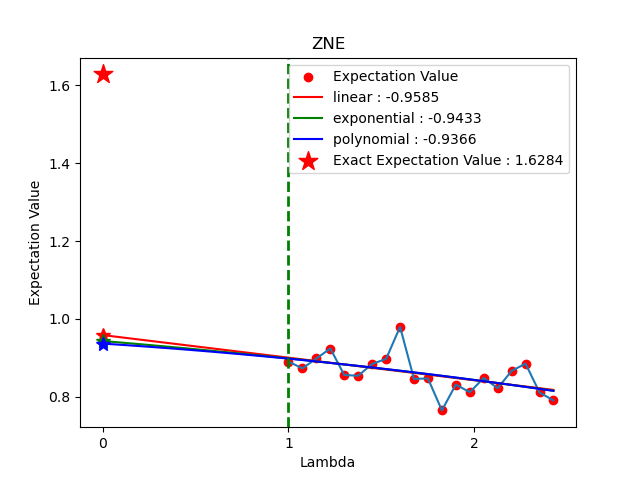

In [39]:
def extrapolate_to_zero(a):
    
    noise_scale_factors = np.array([row[1] for row in a])
    expectation_values = np.array([row[0] for row in a])

    results = {}
    
    def linear_func(x, m, b):
        return m * x + b

    popt, _ = optimize.curve_fit(linear_func, noise_scale_factors, expectation_values)
    results['linear'] = {'func' : linear_func, 'popt' : popt, 'valor no zero' : linear_func(0, *popt)}

    def exp_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    popt, _ = optimize.curve_fit(exp_func, noise_scale_factors, expectation_values, p0=[1.6283761394092897, -0.6040008685907475, 0], maxfev=2000)
    results['exponential'] = {'func' : exp_func, 'popt' : popt, 'valor no zero' : exp_func(0, *popt)}

    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c

    popt, _ = optimize.curve_fit(poly_func, noise_scale_factors, expectation_values)
    results['polynomial'] = {'func' : poly_func, 'popt' : popt, 'valor no zero' : poly_func(0, *popt)}

    return results

extrapolated_values = extrapolate_to_zero(zne_circuits_brisbane_results)

cores = {'linear' : 'red', 'exponential' : 'g', 'polynomial' : 'blue'}

plt.figure()

x, y = np.array([a[1] for a in zne_circuits_brisbane_results]), np.array([a[0] for a in zne_circuits_brisbane_results])

plt.plot(x, -y)
plt.scatter(x, -y, c='red', label = "Expectation Value")

exact_value = 1.6283761394092897
x_linspace = np.linspace(0, max(x), 100)

for modelo, valores in extrapolated_values.items():
    
    plt.plot(x_linspace, -valores['func'](x_linspace, *valores['popt']), color = cores[modelo], label = f"{modelo} : {valores['valor no zero']:.4f}")
    plt.plot(0, -valores['valor no zero'], color = cores[modelo], marker='*', markersize=10)

plt.scatter(0, exact_value, color='red', marker='*', s=200, label=f'Exact Expectation Value : {exact_value:.4f}')
plt.xticks(np.arange(0, 3, 1))
plt.axvline(x=1, color='green', linestyle='--', linewidth=2)

plt.xlabel("Lambda")
plt.ylabel("Expectation Value")
plt.title("ZNE")
plt.legend()
plt.show()

/tmp/ipykernel_952/1147278646.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


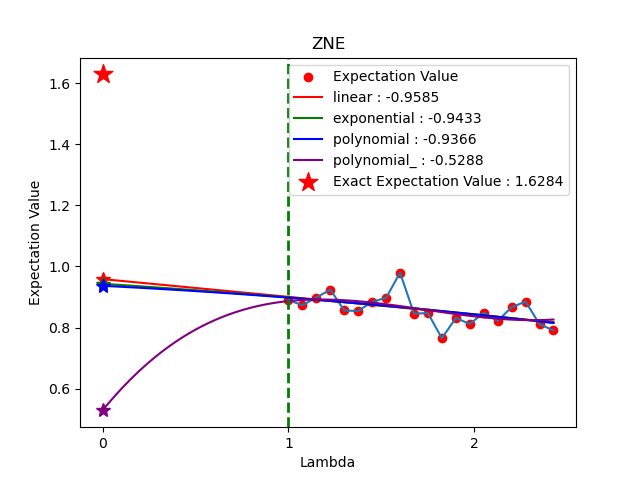

In [52]:
def extrapolate_to_zero(a):
    
    noise_scale_factors = np.array([row[1] for row in a])
    expectation_values = np.array([row[0] for row in a])

    results = {}
    
    def linear_func(x, m, b):
        return m * x + b

    popt, _ = optimize.curve_fit(linear_func, noise_scale_factors, expectation_values)
    results['linear'] = {'func' : linear_func, 'popt' : popt, 'valor no zero' : linear_func(0, *popt)}

    def exp_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    popt, _ = optimize.curve_fit(exp_func, noise_scale_factors, expectation_values, p0=[1.6283761394092897, -0.6040008685907475, 0], maxfev=2000)
    results['exponential'] = {'func' : exp_func, 'popt' : popt, 'valor no zero' : exp_func(0, *popt)}

    def poly_func(x, a, b, c):
        return a * x**2 + b * x + c

    popt, _ = optimize.curve_fit(poly_func, noise_scale_factors, expectation_values)
    results['polynomial'] = {'func' : poly_func, 'popt' : popt, 'valor no zero' : poly_func(0, *popt)}

    degree = 3
    
    poly_coeffs = np.polyfit(noise_scale_factors, expectation_values, degree)
    poly_func = np.poly1d(poly_coeffs)
    results['polynomial_'] = {'func': poly_func, 'coeffs': poly_coeffs, 'valor no zero': poly_func(0)}

    return results

extrapolated_values = extrapolate_to_zero(zne_circuits_brisbane_results)

cores = {'linear' : 'red', 'exponential' : 'g', 'polynomial' : 'blue', 'polynomial_' : 'purple'}

plt.figure()

x, y = np.array([a[1] for a in zne_circuits_brisbane_results]), np.array([a[0] for a in zne_circuits_brisbane_results])

plt.plot(x, -y)
plt.scatter(x, -y, c='red', label = "Expectation Value")

exact_value = 1.6283761394092897
x_linspace = np.linspace(0, max(x), 100)

for modelo, valores in extrapolated_values.items():
    
    if modelo != 'polynomial_':
        plt.plot(x_linspace, -valores['func'](x_linspace, *valores['popt']), color = cores[modelo], label = f"{modelo} : {valores['valor no zero']:.4f}")
        
    else :
        plt.plot(x_linspace, -valores['func'](x_linspace), color = cores[modelo], label = f"{modelo} : {valores['valor no zero']:.4f}")
        
    plt.plot(0, -valores['valor no zero'], color = cores[modelo], marker='*', markersize=10)

plt.scatter(0, exact_value, color='red', marker='*', s=200, label=f'Exact Expectation Value : {exact_value:.4f}')
plt.xticks(np.arange(0, 3, 1))
plt.axvline(x=1, color='green', linestyle='--', linewidth=2)

plt.xlabel("Lambda")
plt.ylabel("Expectation Value")
plt.title("ZNE")
plt.legend()
plt.show()